In [1]:
# You can import *ANYTHING* you want here.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from tqdm import tqdm # this is just a tool to show a progress bar as your simulations are running

%matplotlib inline

# Assignment 7: Comparing Tree Models

Simulation is an incredibly useful tool in data science.  We can use simulation to evaluate how algorithms perform against ground truth, and how algorithms compare to one another.

In this assignment, you will be implementing and extending the nested spheres simulation study found in *Elements of Statistical Learning* page 339. https://web.stanford.edu/~hastie/ElemStatLearn/

# Nested Spheres

Consider a dataset which contains 10 features $X_1 \,, X_2 \,, \cdots \,, X_{10}$.  The features are standard independent Gaussian random variables.  That is to say

$$ X_j \sim \operatorname{Normal}(0,1) \quad \forall j = 1 \dots 10$$

We are going to use these features to study a classification problem.  You will have to create the target variable, $Y$ by computing the following rule:

$$ Y = \begin{cases}  1 \quad \text{ if } \sum_{j=1}^{10} X^2_j>9.34 \\ 0 \quad  \text{ else } \end{cases}$$

# The Simulation Study

Follow these steps to complete the assignment. 

### Part 1 ( X / 25 pts )
Write a function, `generate_data`, that takes a dataset size N and creates a dataset according to the rule above, returning the feature matrix `X` and the labels `y`.

In [2]:
def generate_data(N):
    # Create feature matrix X and labels y
    X = np.random.normal(0, 1, (N, 10))
    
    # Calculate the sum of squares for each sample (row in X)
    sum_of_squares = np.sum(X**2, axis=1)
    
    # Apply the threshold rule to generate labels y
    y = (sum_of_squares > 9.34).astype(int)

    return X,y

## Part 2 ( X / 25 pts )

Write a function `run_simulation` that accepts two numbers, Ntrain and Ntest. It should generate a training set and testing set using your `generate_data` function and then train **four classifiers**. The first should be a bagged decision tree, the second should be a random forest with `max_features=1`, the third should be a random forest with `max_features=3`, and the fourth can be anything you like, for example a random forest with more features or an XGboost model. Use 500 trees in your random forests and the bagged classifier. The function should return the accuracy for each of these models estimated using the corresponding test set you generated.

In [3]:
def run_simulation(Ntrain,Ntest):
    # Code to generate data and run one simulation
    # Generate training and testing data
    X_train, y_train = generate_data(Ntrain)
    X_test, y_test = generate_data(Ntest)
    
    # Bagged Decision Tree
    bagged_tree = BaggingClassifier(
        estimator=DecisionTreeClassifier(), 
        n_estimators=500, 
        random_state=42
    )
    bagged_tree.fit(X_train, y_train)
    bag_accuracy = accuracy_score(y_test, bagged_tree.predict(X_test))
    
    # Random Forest with max_features=1
    rf_mf1 = RandomForestClassifier(
        n_estimators=500, 
        max_features=1, 
        random_state=42
    )
    rf_mf1.fit(X_train, y_train)
    rf_mf1_accuracy = accuracy_score(y_test, rf_mf1.predict(X_test))
    
    # Random Forest with max_features=3
    rf_mf3 = RandomForestClassifier(
        n_estimators=500, 
        max_features=3, 
        random_state=42
    )
    rf_mf3.fit(X_train, y_train)
    rf_mf3_accuracy = accuracy_score(y_test, rf_mf3.predict(X_test))
    
    # My classifier: Random Forest with max_features=5
    my_classifier = RandomForestClassifier(
        n_estimators=500, 
        max_features=5, 
        random_state=42
    )
    my_classifier.fit(X_train, y_train)
    my_classifier_accuracy = accuracy_score(y_test, my_classifier.predict(X_test))
    
    return bag_accuracy, rf_mf1_accuracy, rf_mf3_accuracy, my_classifier_accuracy

## Part 3 ( X / 25 pts )

Run 50 simulations using a training set of size 1000 and a test set of size 5000 and record all the results in four vectors, one for each type of model. *You should probably debug your code using smaller training and test set sized first because these will take a while. The full simulation takes 10 minutes on my old 2.8GHz core i5 laptop, 5 min on my new-ish M2 MacBook Air.*

In [4]:
def run_multiple_simulations(num_simulations=50, Ntrain=1000, Ntest=5000):
    # Initialize lists to store accuracy results for each model
    bagged_accuracies = []
    rf_mf1_accuracies = []
    rf_mf3_accuracies = []
    my_classifier_accuracies = []
    
    # Run the simulation `num_simulations` times
    for i in range(num_simulations):
        print(f"Running simulation {i + 1}/{num_simulations}...")
        # Run one simulation and retrieve accuracies for each model
        bag_accuracy, rf_mf1_accuracy, rf_mf3_accuracy, my_classifier_accuracy = run_simulation(Ntrain, Ntest)
        
        # Append results to the respective lists
        bagged_accuracies.append(bag_accuracy)
        rf_mf1_accuracies.append(rf_mf1_accuracy)
        rf_mf3_accuracies.append(rf_mf3_accuracy)
        my_classifier_accuracies.append(my_classifier_accuracy)
    
    return bagged_accuracies, rf_mf1_accuracies, rf_mf3_accuracies, my_classifier_accuracies

# Running the simulation with 50 repetitions
bagged_accuracies, rf_mf1_accuracies, rf_mf3_accuracies, my_classifier_accuracies = run_multiple_simulations()

Running simulation 1/50...
Running simulation 2/50...
Running simulation 3/50...
Running simulation 4/50...
Running simulation 5/50...
Running simulation 6/50...
Running simulation 7/50...
Running simulation 8/50...
Running simulation 9/50...
Running simulation 10/50...
Running simulation 11/50...
Running simulation 12/50...
Running simulation 13/50...
Running simulation 14/50...
Running simulation 15/50...
Running simulation 16/50...
Running simulation 17/50...
Running simulation 18/50...
Running simulation 19/50...
Running simulation 20/50...
Running simulation 21/50...
Running simulation 22/50...
Running simulation 23/50...
Running simulation 24/50...
Running simulation 25/50...
Running simulation 26/50...
Running simulation 27/50...
Running simulation 28/50...
Running simulation 29/50...
Running simulation 30/50...
Running simulation 31/50...
Running simulation 32/50...
Running simulation 33/50...
Running simulation 34/50...
Running simulation 35/50...
Running simulation 36/50...
R

## Part 4 (X / 25 pts) 
Plot the error rates for each model using a boxplot for each one. The four models should be across the x-axis, and the y-axis should be test accuracy.

Running simulation 1/50...
Running simulation 2/50...
Running simulation 3/50...
Running simulation 4/50...
Running simulation 5/50...
Running simulation 6/50...
Running simulation 7/50...
Running simulation 8/50...
Running simulation 9/50...
Running simulation 10/50...
Running simulation 11/50...
Running simulation 12/50...
Running simulation 13/50...
Running simulation 14/50...
Running simulation 15/50...
Running simulation 16/50...
Running simulation 17/50...
Running simulation 18/50...
Running simulation 19/50...
Running simulation 20/50...
Running simulation 21/50...
Running simulation 22/50...
Running simulation 23/50...
Running simulation 24/50...
Running simulation 25/50...
Running simulation 26/50...
Running simulation 27/50...
Running simulation 28/50...
Running simulation 29/50...
Running simulation 30/50...
Running simulation 31/50...
Running simulation 32/50...
Running simulation 33/50...
Running simulation 34/50...
Running simulation 35/50...
Running simulation 36/50...
R

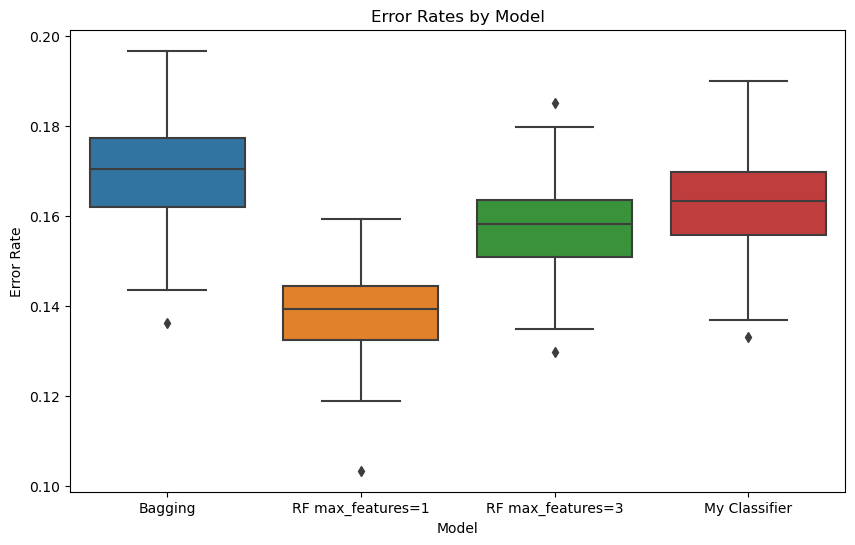

In [5]:
# Plot the error rates as a box plot by model to complete the assignment.
# Assuming you have collected accuracy scores in these lists after running 50 simulations

# Assign the actual accuracy lists returned from your simulation
bagged_accuracies, rf_mf1_accuracies, rf_mf3_accuracies, my_classifier_accuracies = run_multiple_simulations()

# Calculate error rates
bagged_errors = [1 - acc for acc in bagged_accuracies]
rf_mf1_errors = [1 - acc for acc in rf_mf1_accuracies]
rf_mf3_errors = [1 - acc for acc in rf_mf3_accuracies]
my_classifier_errors = [1 - acc for acc in my_classifier_accuracies]

# Prepare data for plotting
error_data = {
    "Bagging": bagged_errors,
    "RF max_features=1": rf_mf1_errors,
    "RF max_features=3": rf_mf3_errors,
    "My Classifier": my_classifier_errors
}

# Convert data to a DataFrame for seaborn
error_df = pd.DataFrame(error_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=error_df)
plt.title("Error Rates by Model")
plt.xlabel("Model")
plt.ylabel("Error Rate")
plt.show()